In [2]:
from handle_single_working import HandleSingleWorking
import os
import pandas as pd
from figure_plot import base_plot
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 文件目录处理

In [3]:
path = r'C:\Users\lijunjie3\OneDrive\工作电脑文件\IVET 数据处理\1MEB_UAES_Base_plus_freilauf'

In [4]:
res = list()
sub_dirs = list(os.walk(path))[0][1]  # 
print(sub_dirs)

['IVET1', 'IVET2', 'Std']


In [5]:
res = dict()
for sub_dir in sub_dirs:
    sub_path = os.path.join(path, sub_dir)
    res[sub_dir] = HandleSingleWorking(sub_path, test_condition='open_circuit', convert_to_csv=False)  

# 2. 运行数据处理程序

In [6]:
for value in res.values():
    value.run()

# 3. 绘制电机三相电压图

In [7]:
y = list()
marker = ['v', '^', '<']
for index, sub_res in enumerate(res.values()):
    try:
        y.append({'data': [sub_res.test.plot_data['SO_N_HM [1/min]'], sub_res.test.plot_data['average_voltage']],
       'style': {'linestyle': '-', 'marker': marker[index], 'label': sub_dirs[index]}})
    except:
        y.append({'data': [sub_res.test.plot_data['SO_N_HM'], sub_res.test.plot_data['average_voltage']],
       'style': {'linestyle': '-', 'marker': marker[index], 'label': sub_dirs[index]}})

paras = {'x_label': "Speed [rpm]",
             'y_label': "Three-phase line voltage RMS average [V]",
             'title': 'open circuit three phase voltage'}

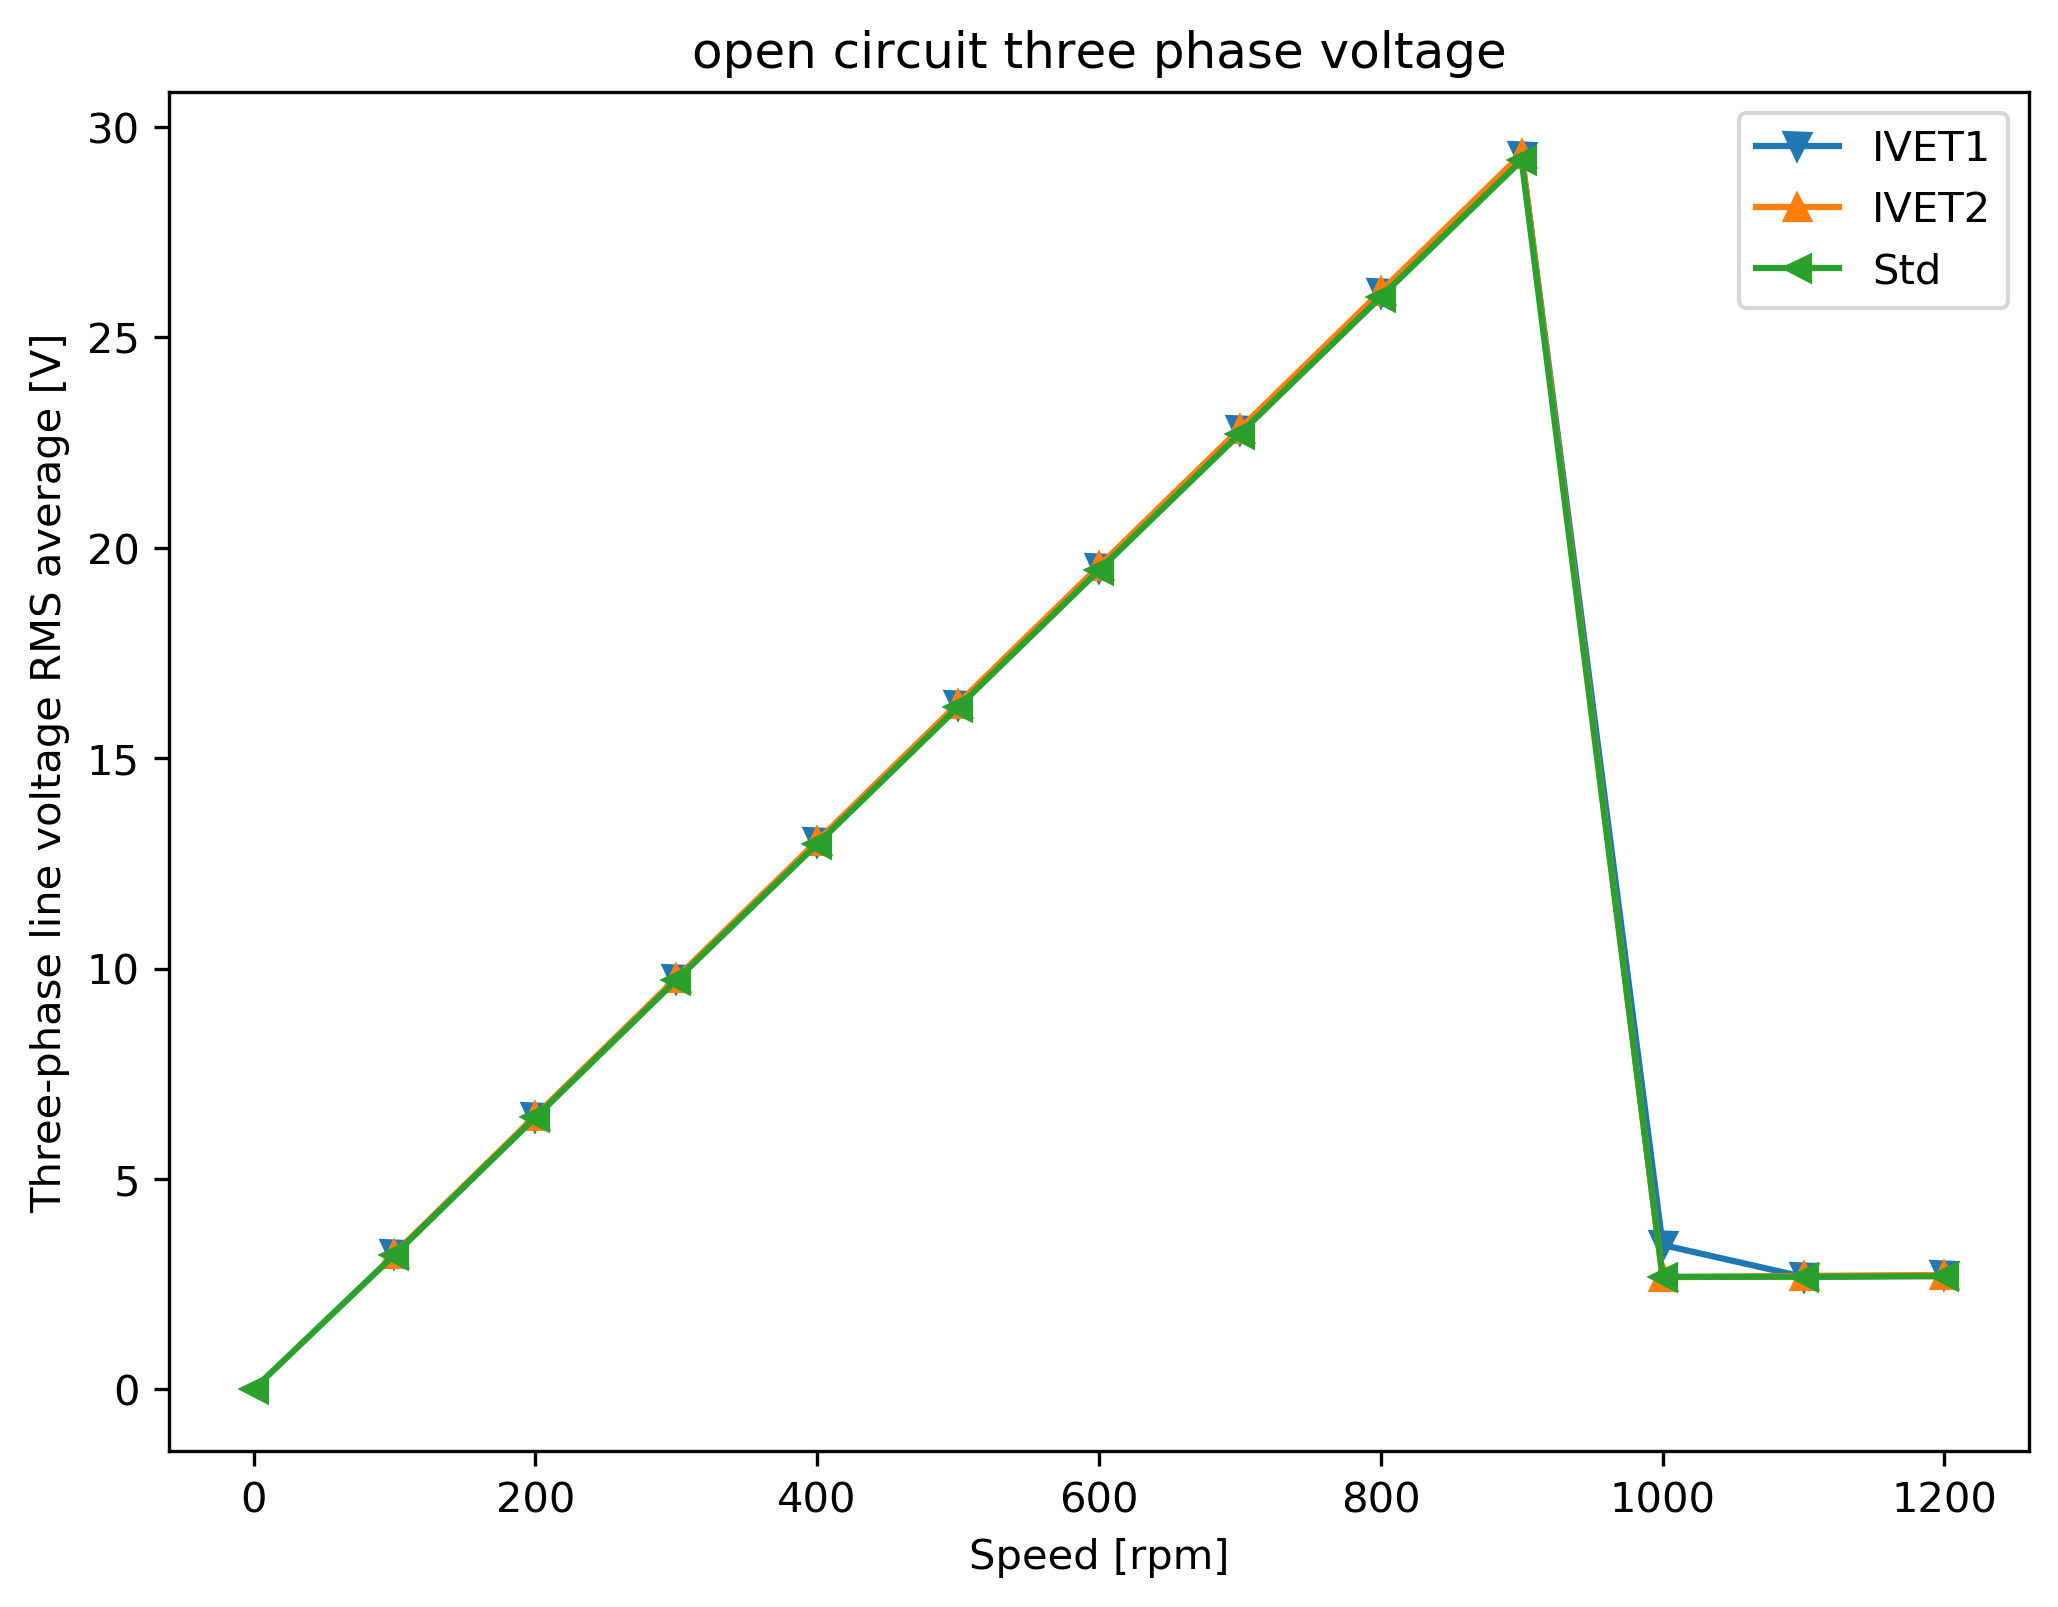

In [8]:
fig = base_plot(y, paras)

# 4. 转矩值对比

In [9]:
y = list()
marker = ['v', '^', '<']
for index, sub_res in enumerate(res.values()):
    try:
        y.append({'data': [sub_res.test.plot_data['SO_N_HM'], sub_res.test.plot_data['M_HMmess']],
       'style': {'linestyle': '-', 'marker': marker[index], 'label': sub_dirs[index]}})
    except:
         y.append({'data': [sub_res.test.plot_data['SO_N_HM [1/min]'], sub_res.test.plot_data['M_HMmess [Nm]']],
       'style': {'linestyle': '-', 'marker': marker[index], 'label': sub_dirs[index]}})

paras = {'x_label': "Speed [rpm]",
             'y_label': "Torque [Nm]",
             'title': 'open circuit torque'}

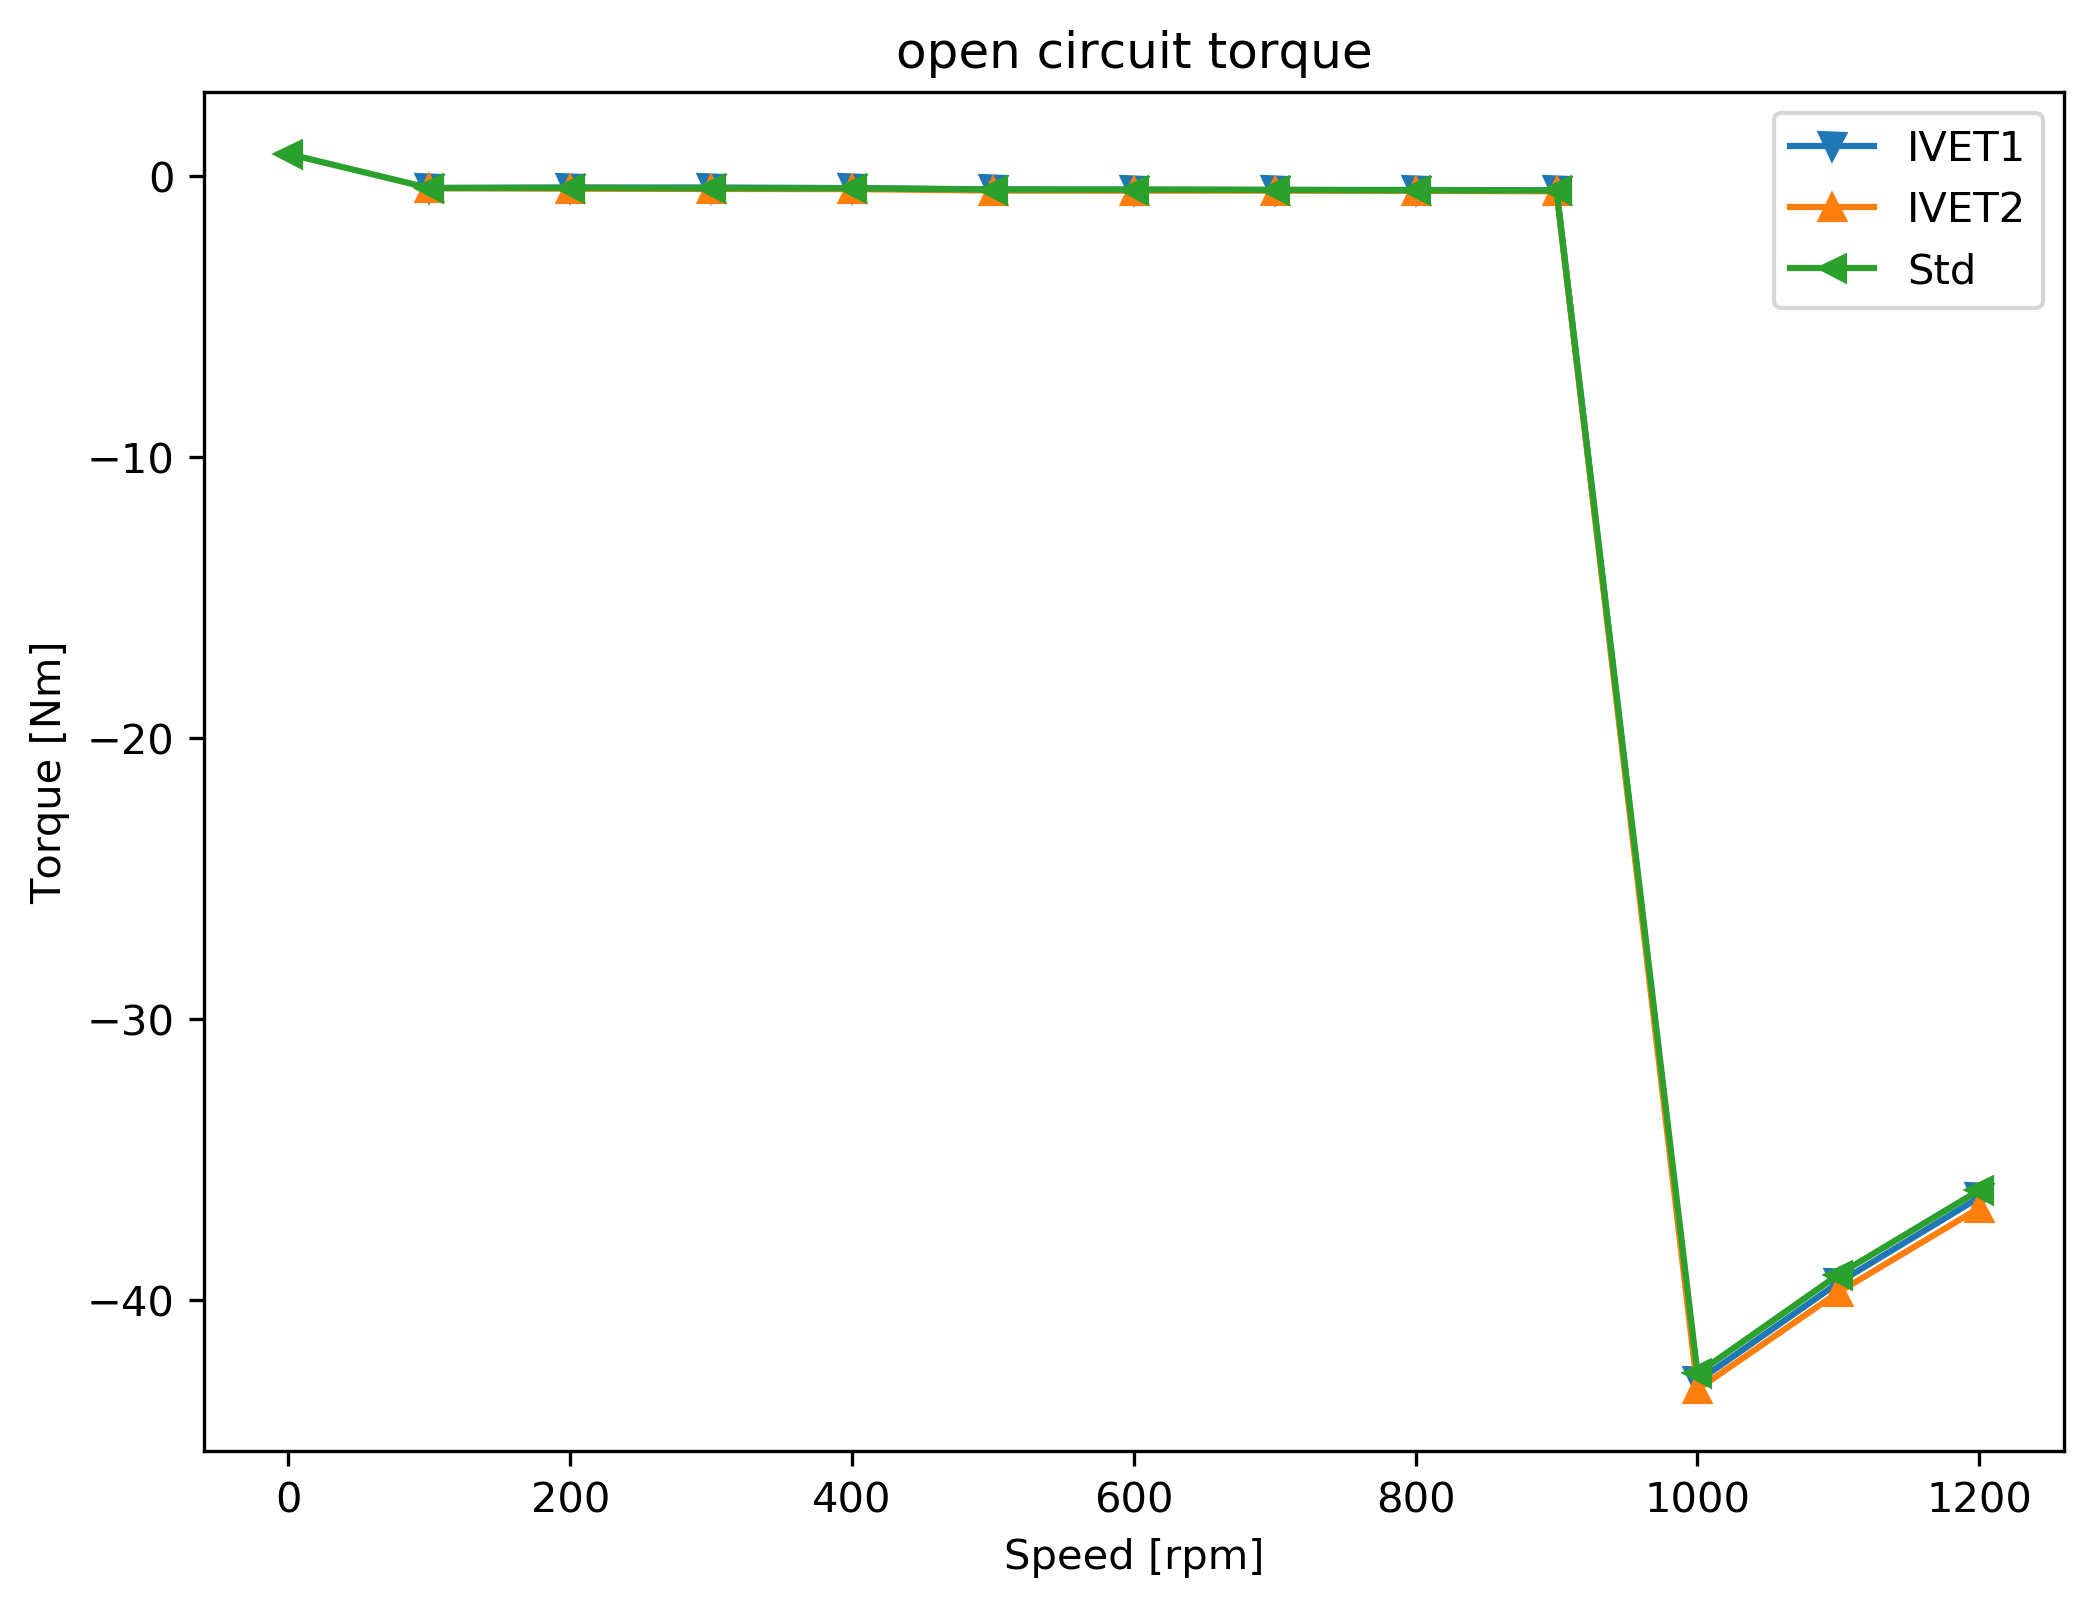

In [10]:
fig = base_plot(y, paras)

# 5. 获取对比数据

In [11]:
for sub_res in res.values():
    try:
        sub_res.test.plot_data = sub_res.test.plot_data.set_index('SO_N_HM')
    except:
        sub_res.test.plot_data = sub_res.test.plot_data.set_index('SO_N_HM [1/min]')

In [12]:
voltage_data = pd.DataFrame()


for index, sub_res in enumerate(res.values()):
    voltage_data[sub_dirs[index]] = sub_res.test.plot_data['average_voltage']


round(voltage_data, 2)

,IVET1,IVET2,Std
SO_N_HM,,,
100.0,3.21,3.22,3.20
200.0,6.48,6.50,6.46
300.0,9.75,9.77,9.72
400.0,13.00,13.03,12.96
500.0,16.27,16.30,16.21
600.0,19.53,19.56,19.46
700.0,22.79,22.83,22.71
800.0,26.05,26.09,25.96
900.0,29.32,29.36,29.21


In [14]:
torque_data = pd.DataFrame()

for index, sub_res in enumerate(res.values()):
    try:
        torque_data[sub_dirs[index]] = sub_res.test.plot_data['M_HMmess']
    except:
        torque_data[sub_dirs[index]] = sub_res.test.plot_data['M_HMmess [Nm]']
            
round(torque_data, 2)

,IVET1,IVET2,Std
SO_N_HM,,,
100.0,-0.42,-0.43,-0.42
200.0,-0.40,-0.45,-0.42
300.0,-0.40,-0.45,-0.43
400.0,-0.42,-0.46,-0.43
500.0,-0.47,-0.51,-0.48
600.0,-0.48,-0.52,-0.48
700.0,-0.49,-0.51,-0.49
800.0,-0.49,-0.52,-0.50
900.0,-0.50,-0.54,-0.51
